In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("udemy_courses.csv")

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(6)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(3672, 12)

In [8]:
df.duplicated().any()

np.False_

# Find out numbers of courses per subjects

In [9]:
df.subject.value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

C:\Users\Siraj\AppData\Local\Temp\ipykernel_10040\3383932467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=df,palette="Set1")


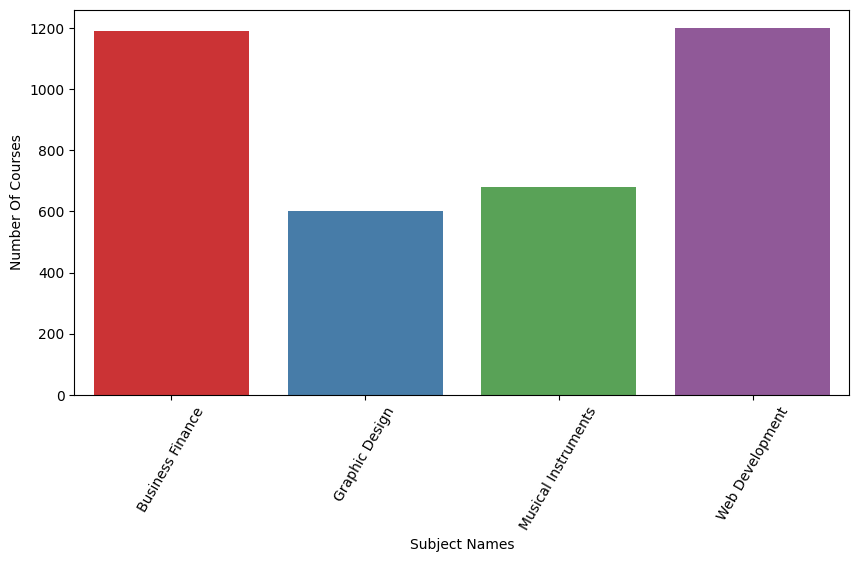

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='subject', data=df,palette="Set1")
plt.ylabel("Number Of Courses")
plt.xlabel("Subject Names")
# Correct way:
plt.xticks(rotation=60)
plt.show()

# For which level udemy providing the course

In [11]:
df["level"].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

C:\Users\Siraj\AppData\Local\Temp\ipykernel_10040\887496940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='level', data=df,palette="Set1")


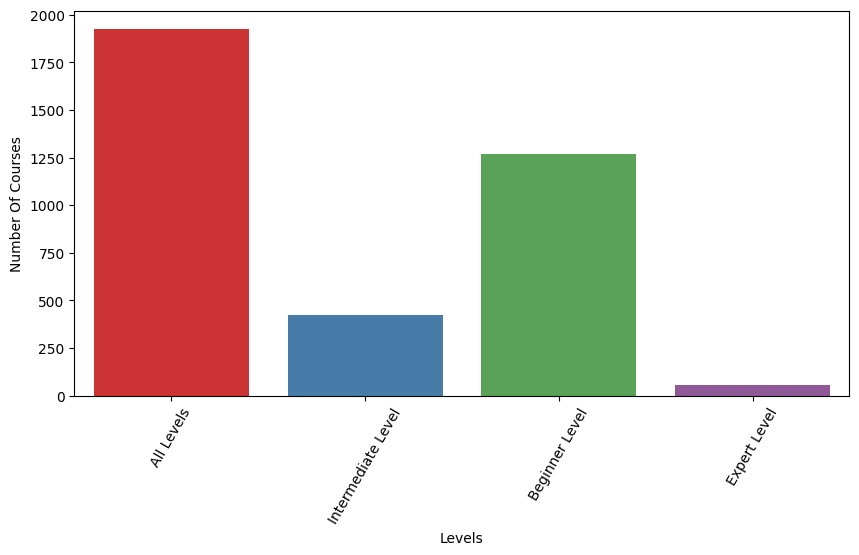

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x='level', data=df,palette="Set1")
plt.ylabel("Number Of Courses")
plt.xlabel("Levels")
# Correct way:
plt.xticks(rotation=60)
plt.show()

# Display the count of paid and free courses

In [13]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [14]:
df.is_paid.value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

In [15]:
df['is_paid'] = df['is_paid'].map({True: 'paid', False: 'free'})

C:\Users\Siraj\AppData\Local\Temp\ipykernel_10040\4052688747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_paid', data=df,palette="Set1")


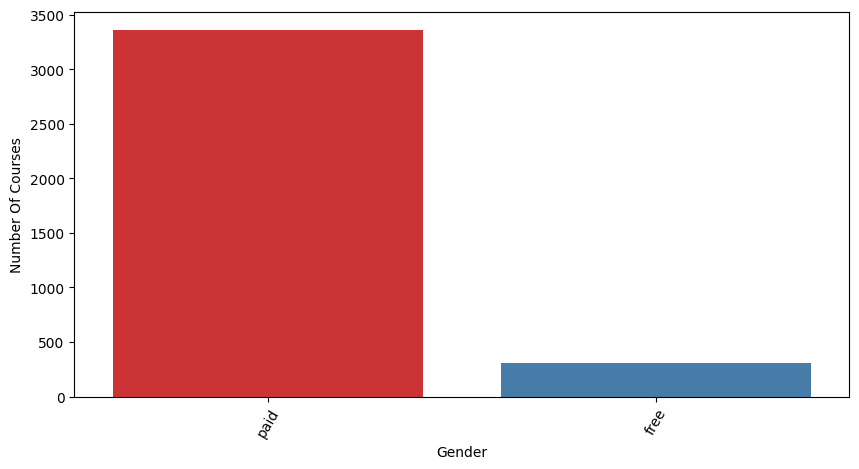

In [16]:

plt.figure(figsize=(10, 5))
sns.countplot(x='is_paid', data=df,palette="Set1")
plt.ylabel("Number Of Courses")
plt.xlabel("Gender")
# Correct way:
plt.xticks(rotation=60)
plt.show()

In [17]:
df.is_paid.unique()

array(['paid', 'free'], dtype=object)

# Which course has more Lectures(free or paid)

In [18]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [19]:
df.groupby("is_paid")["num_lectures"].describe()

,count,mean,std,min,25%,50%,75%,max
is_paid,,,,,,,,
free,310.0,21.416129,18.322119,5.0,11.0,17.0,25.0,145.0
paid,3362.0,41.866746,52.059119,0.0,15.0,26.0,48.0,779.0


# Which course has higher numbers of subscriber(free or paid)

In [20]:
df.groupby("is_paid")["num_subscribers"].mean()


is_paid
free    11533.951613
paid     2421.270077
Name: num_subscribers, dtype: float64

C:\Users\Siraj\AppData\Local\Temp\ipykernel_10040\4144544312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_paid",y="num_subscribers",data=df,palette="Set2")


<Axes: xlabel='is_paid', ylabel='num_subscribers'>

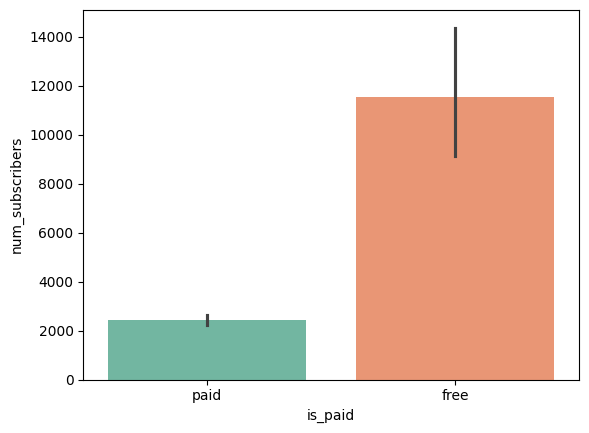

In [21]:
sns.barplot(x="is_paid",y="num_subscribers",data=df,palette="Set2")

# Which Level has the highest Numbers of subscribers

In [46]:
df.groupby("level")["num_subscribers"].sum().sort_values(ascending=False)

level
All Levels            6871791
Beginner Level        4051843
Intermediate Level     742005
Expert Level            50196
Name: num_subscribers, dtype: int64

C:\Users\Siraj\AppData\Local\Temp\ipykernel_10040\279020446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="level",y="num_subscribers",data=df,palette="Set1")


[Text(0, 0, '3569.76')]

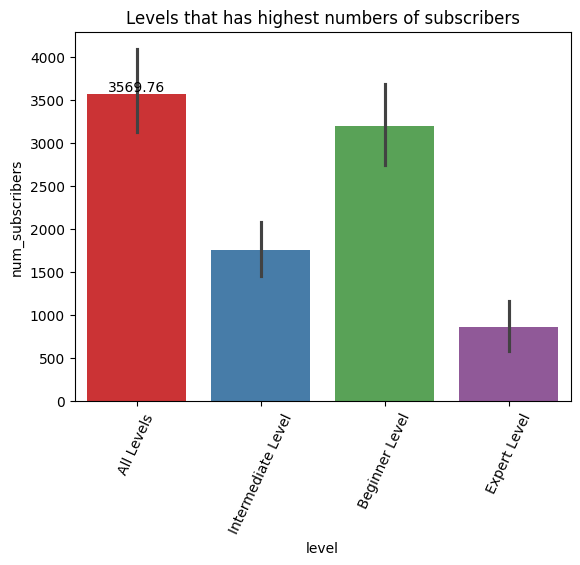

In [23]:
plt.title("Levels that has highest numbers of subscribers")
plt.xticks(rotation=65)
ax=sns.barplot(x="level",y="num_subscribers",data=df,palette="Set1")
ax.bar_label(ax.containers[0])



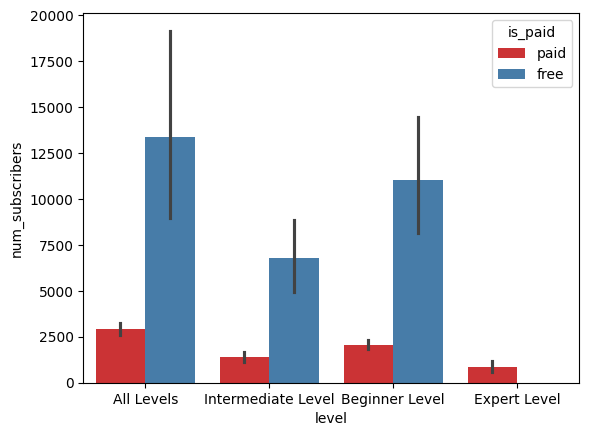

In [24]:
for container in ax.containers:
    ax.bar_label(container)
sns.barplot(x="level",y="num_subscribers",hue="is_paid",data=df,palette="Set1")

plt.show()


# Find most popular course title

In [25]:
df.groupby("course_title")["num_subscribers"].max().sort_values(ascending=False).head(1)

course_title
Learn HTML5 Programming From Scratch    268923
Name: num_subscribers, dtype: int64

In [47]:
df[df["num_subscribers"]==df["num_subscribers"].max()]

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

# Display 10 most popular course as per number of subscribers

In [27]:
df.groupby("course_title")["num_subscribers"].mean().sort_values(ascending=False).head(10)

course_title
Learn HTML5 Programming From Scratch                          268923.0
Coding for Entrepreneurs Basic                                161029.0
The Web Developer Bootcamp                                    121584.0
Build Your First Website in 1 Week with HTML5 and CSS3        120291.0
The Complete Web Developer Course 2.0                         114512.0
Free Beginner Electric Guitar Lessons                         101154.0
Web Design for Web Developers: Build Beautiful Websites!       98867.0
Learn Javascript & JQuery From Scratch                         84897.0
Practical PHP: Master the Basics and Code Dynamic Websites     83737.0
JavaScript: Understanding the Weird Parts                      79612.0
Name: num_subscribers, dtype: float64

In [28]:
top10=df.sort_values(by="num_subscribers",ascending=False).head(10)

C:\Users\Siraj\AppData\Local\Temp\ipykernel_10040\1452584891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="num_subscribers",y="course_title",data=top10,palette="Set1")


<Axes: xlabel='num_subscribers', ylabel='course_title'>

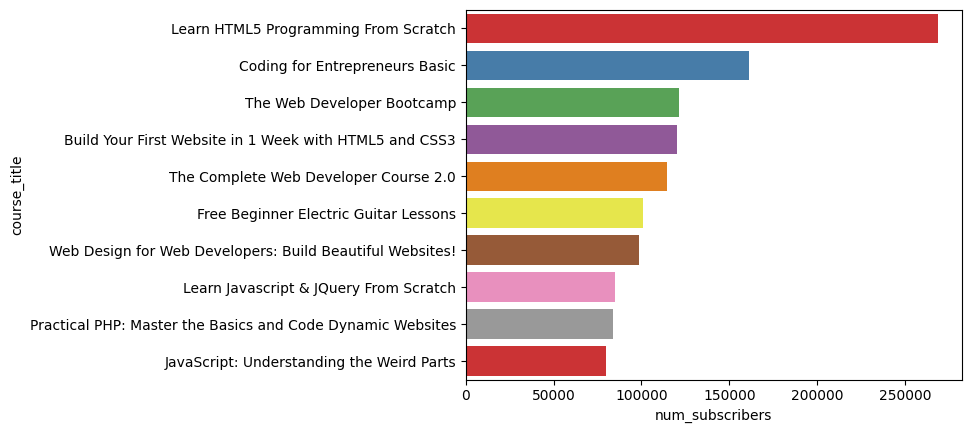

In [29]:
sns.barplot(x="num_subscribers",y="course_title",data=top10,palette="Set1")

# Find the course having the highest numbers of reviews

In [30]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [31]:
top10 =df.sort_values(by="num_reviews",ascending=False).head(10)

C:\Users\Siraj\AppData\Local\Temp\ipykernel_10040\319076655.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="num_reviews",y="course_title",data=top10,palette="Set1")


<Axes: xlabel='num_reviews', ylabel='course_title'>

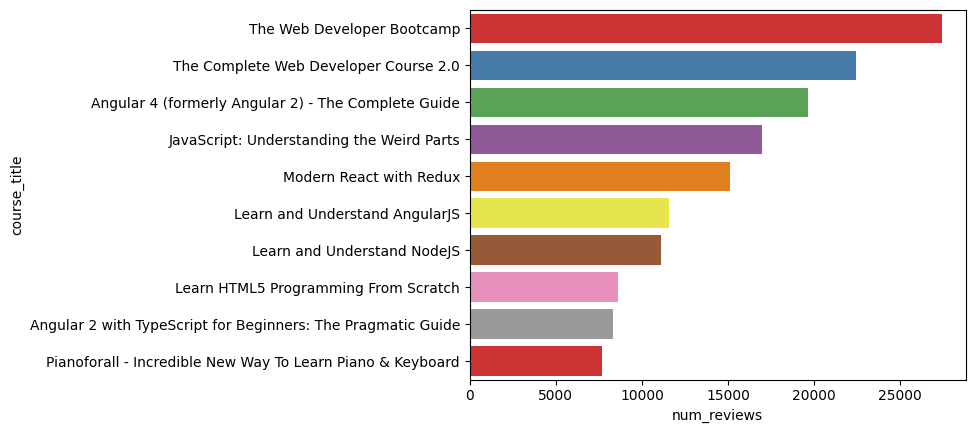

In [32]:
sns.barplot(x="num_reviews",y="course_title",data=top10,palette="Set1")


# Subjects and their reviews

C:\Users\Siraj\AppData\Local\Temp\ipykernel_10040\1607740379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="subject",y="num_reviews",data=df,palette="Set1")


<Axes: xlabel='subject', ylabel='num_reviews'>

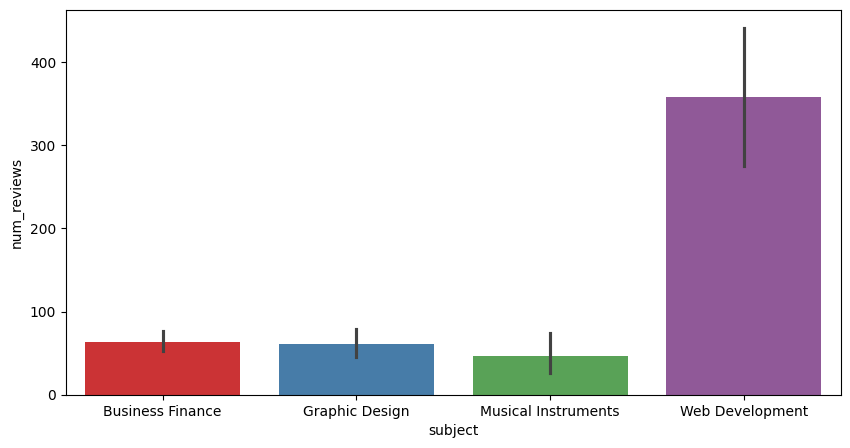

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x="subject",y="num_reviews",data=df,palette="Set1")


# Does Price Affect Numbers of Reviews

<Axes: xlabel='price', ylabel='num_reviews'>

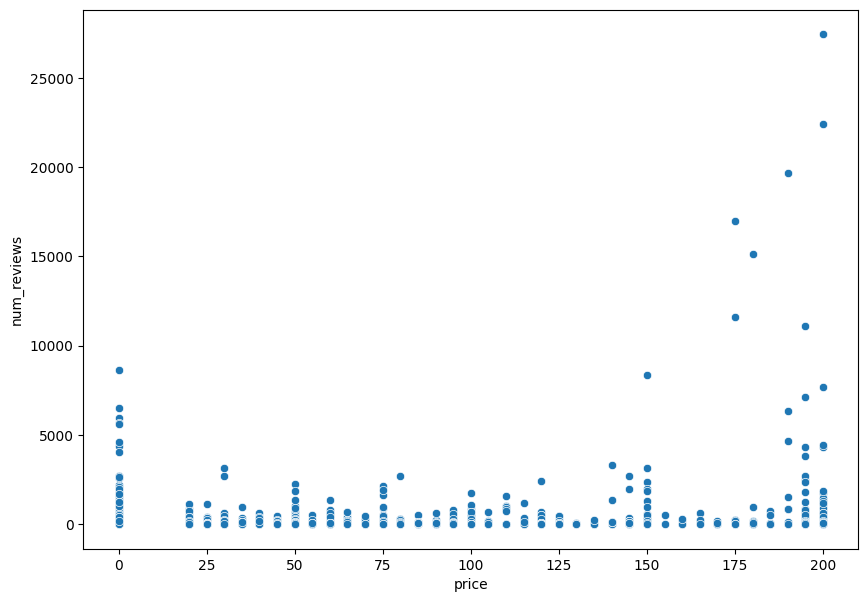

In [34]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="price",y="num_reviews",data=df)

# Find total courses related to python

In [35]:
sum(df.course_title.str.contains("python",case=False))

29

# Display 10 most Popular Python Courses as per numbers of subscribers

In [36]:
python=df[df.course_title.str.contains("python",case=False)].sort_values(by="num_subscribers",ascending=False).head(10)

C:\Users\Siraj\AppData\Local\Temp\ipykernel_10040\3657772110.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="num_subscribers",y="course_title",data=python,palette="Set1")


<Axes: xlabel='num_subscribers', ylabel='course_title'>

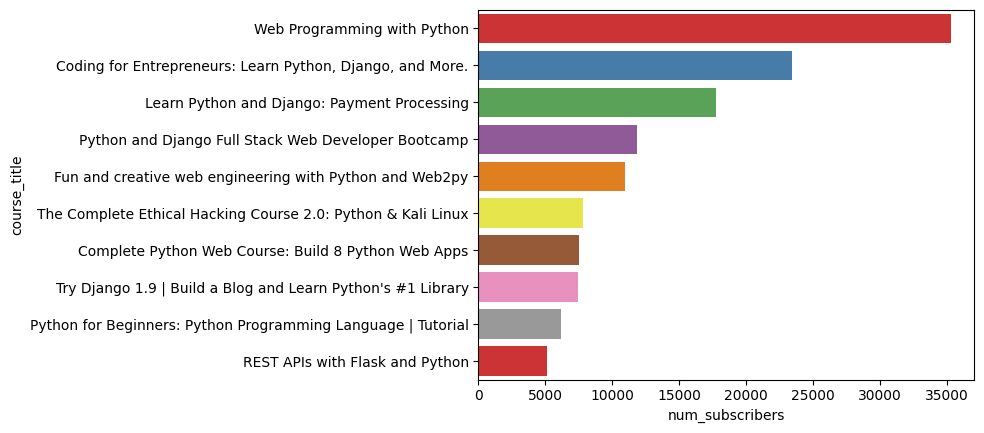

In [37]:
sns.barplot(x="num_subscribers",y="course_title",data=python,palette="Set1")

# In which year the higher numbers of course posted

In [38]:
df.published_timestamp=pd.to_datetime(df.published_timestamp)

In [39]:
df["year"]=df["published_timestamp"].dt.year

In [40]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'year'],
      dtype='object')

In [41]:
df.groupby("year")["course_id"].count()

year
2011       5
2012      45
2013     201
2014     490
2015    1014
2016    1204
2017     713
Name: course_id, dtype: int64

C:\Users\Siraj\AppData\Local\Temp\ipykernel_10040\740484093.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="year",data=df,palette="dark")


<Axes: xlabel='year', ylabel='count'>

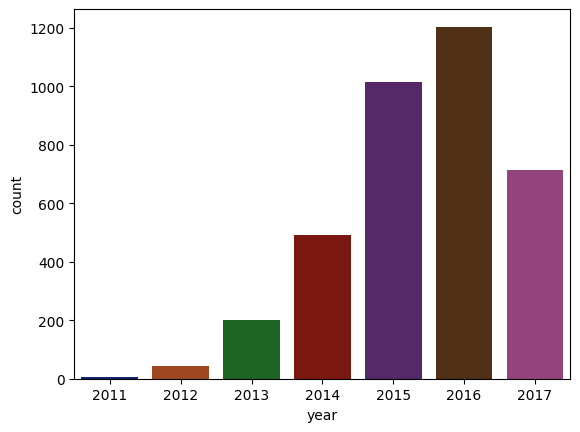

In [42]:
sns.countplot(x="year",data=df,palette="dark")

# Display category-wise count of posted subjects [year wise]

In [43]:
df.groupby("year")["subject"].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64

In [44]:
grp = df.groupby("year")["subject"].value_counts().unstack()

<Axes: xlabel='year'>

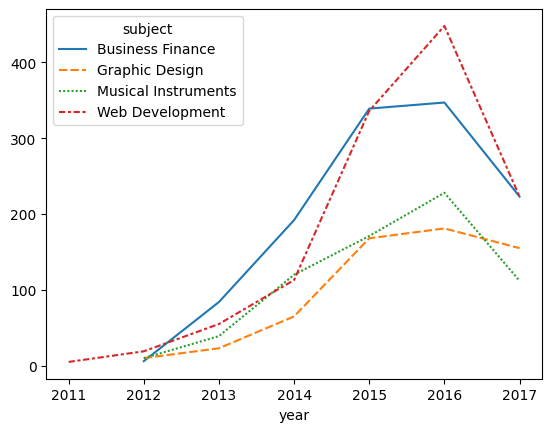

In [45]:
sns.lineplot(data=grp)